In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("ai_job_dataset.csv")

In [21]:
df_cleaned = df.dropna()

In [22]:
filter = df_cleaned['company_location'] == 'United States'
df_cleaned = df_cleaned[filter]

In [23]:
df_longer = df_cleaned.melt(
    id_vars=["job_title", 'experience_level'],
    value_vars="salary_usd",
    var_name="salaries"
)

In [24]:
df_pivot = df_longer.pivot_table(
    index=["job_title", 'experience_level'],
    columns="salaries",
    aggfunc="mean"
)

In [25]:
df_stacked = df_pivot.stack().reset_index()
df_stacked = df_stacked.drop(columns=['salaries'])
df_stacked = df_stacked.rename(columns={'value': 'averange_salary'})

C:\Users\lazar\AppData\Local\Temp\ipykernel_1376\3854648025.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_stacked = df_pivot.stack().reset_index()


In [26]:
colors = plt.cm.Dark2.colors
bar_height = 0.8
n_items = None
y_pos = None

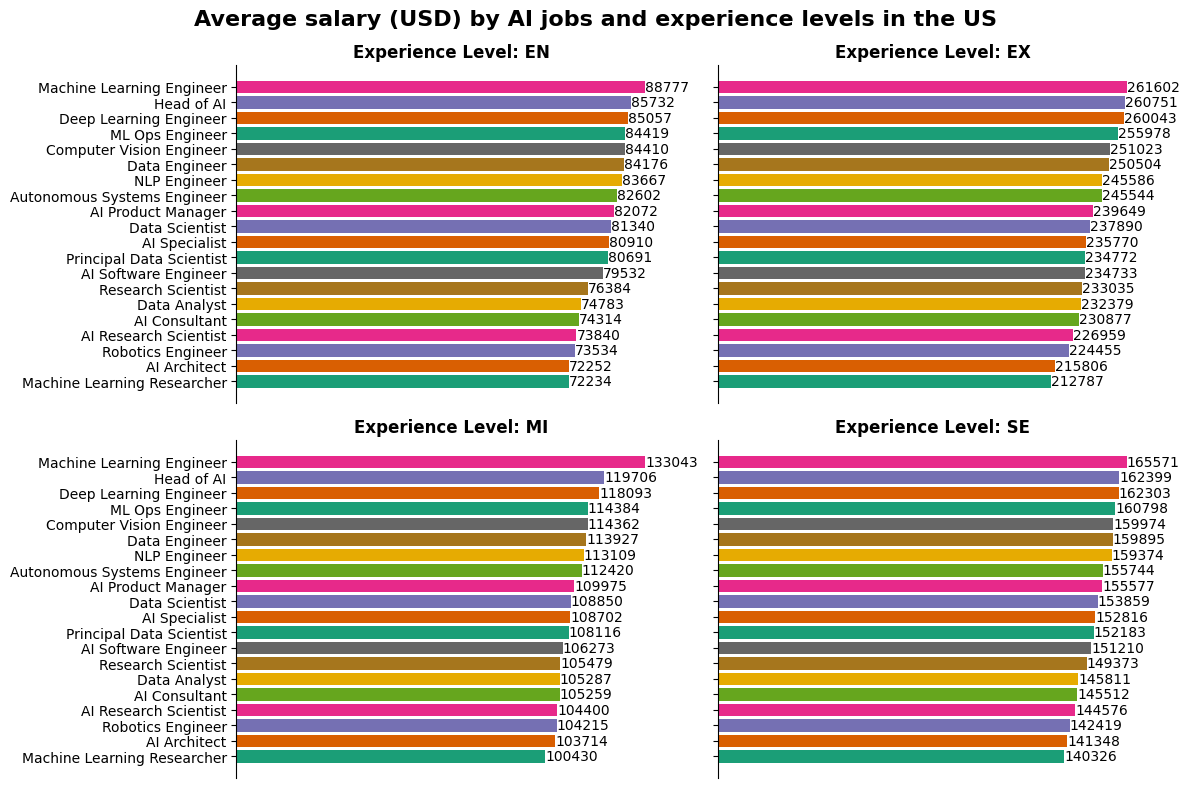

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharey=True)

# EN Experience Level

filter_en_experience_level = df_stacked['experience_level'] == 'EN'
df_filtered_en_xp_level = df_stacked[filter_en_experience_level]
df_filtered_en_xp_level = df_filtered_en_xp_level.reset_index()
df_filtered_en_xp_level = df_filtered_en_xp_level.drop(columns=['index'])
df_filtered_en_xp_level = df_filtered_en_xp_level.sort_values(by=('averange_salary'), ascending=True)

n_items = len(df_filtered_en_xp_level.index)
y_pos = np.arange(n_items)

bars_en_xp_level = ax[0, 0].barh(y_pos, df_filtered_en_xp_level['averange_salary'], bar_height, color=colors)
ax[0, 0].bar_label(bars_en_xp_level, fmt="%.0f")
ax[0, 0].set_yticks(y_pos)
ax[0, 0].set_yticklabels(df_filtered_en_xp_level['job_title'])
ax[0, 0].spines[['top', 'right', 'bottom']].set_visible(False)
ax[0, 0].xaxis.set_visible(False)
ax[0, 0].set_title("Experience Level: EN", fontweight="bold")

# EN Experience Level

filter_ex_experience_level = df_stacked['experience_level'] == 'EX'
df_filtered_ex_xp_level = df_stacked[filter_ex_experience_level]
df_filtered_ex_xp_level = df_filtered_ex_xp_level.reset_index()
df_filtered_ex_xp_level = df_filtered_ex_xp_level.drop(columns=['index'])
df_filtered_ex_xp_level = df_filtered_ex_xp_level.sort_values(by=('averange_salary'), ascending=True)

bars_en_xp_level = ax[0, 1].barh(y_pos, df_filtered_ex_xp_level['averange_salary'], bar_height, color=colors)
ax[0, 1].bar_label(bars_en_xp_level, fmt="%.0f")
ax[0, 1].set_yticks(y_pos)
ax[0, 1].set_yticklabels(df_filtered_ex_xp_level['job_title'])
ax[0, 1].spines[['top', 'right', 'bottom']].set_visible(False)
ax[0, 1].xaxis.set_visible(False)
ax[0, 1].set_title("Experience Level: EX", fontweight="bold")

# MI Experience Level

filter_mi_experience_level = df_stacked['experience_level'] == 'MI'
df_filtered_mi_xp_level = df_stacked[filter_mi_experience_level]
df_filtered_mi_xp_level = df_filtered_mi_xp_level.reset_index()
df_filtered_mi_xp_level = df_filtered_mi_xp_level.drop(columns=['index'])
df_filtered_mi_xp_level = df_filtered_mi_xp_level.sort_values(by=('averange_salary'), ascending=True)

bars_mi_xp_level = ax[1, 0].barh(y_pos, df_filtered_mi_xp_level['averange_salary'], bar_height, color=colors)
ax[1, 0].bar_label(bars_mi_xp_level, fmt="%.0f")
ax[1, 0].set_yticks(y_pos)
ax[1, 0].set_yticklabels(df_filtered_mi_xp_level['job_title'])
ax[1, 0].spines[['top', 'right', 'bottom']].set_visible(False)
ax[1, 0].xaxis.set_visible(False)
ax[1, 0].set_title("Experience Level: MI", fontweight="bold")

# SE Experience Level

filter_se_experience_level = df_stacked['experience_level'] == 'SE'
df_filtered_se_xp_level = df_stacked[filter_se_experience_level]
df_filtered_se_xp_level = df_filtered_se_xp_level.reset_index()
df_filtered_se_xp_level = df_filtered_se_xp_level.drop(columns=['index'])
df_filtered_se_xp_level = df_filtered_se_xp_level.sort_values(by=('averange_salary'), ascending=True)

bars_se_xp_level = ax[1, 1].barh(y_pos, df_filtered_se_xp_level['averange_salary'], bar_height, color=colors)
ax[1, 1].bar_label(bars_se_xp_level, fmt="%.0f")
ax[1, 1].set_yticks(y_pos)
ax[1, 1].set_yticklabels(df_filtered_mi_xp_level['job_title'])
ax[1, 1].spines[['top', 'right', 'bottom']].set_visible(False)
ax[1, 1].xaxis.set_visible(False)
ax[1, 1].set_title("Experience Level: SE", fontweight="bold")

fig.suptitle("Average salary (USD) by AI jobs and experience levels in the US", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()